# 시각화 최종 함수화

In [1]:
##함수화
##인원 표시
import cv2
import folium
import json
from folium.plugins import TimeSliderChoropleth
import re
import pandas as pd
import matplotlib.pyplot as plt

data_dong = pd.read_csv('./float_population_result.csv', encoding= 'CP949', index_col= 0, header= 0, engine= 'python')
data_gu = pd.read_csv('./float_population_result_gu.csv', encoding= 'CP949', index_col= 0, header= 0, engine= 'python')

menu = []

for m in data_dong.columns[1:]:
    menu.append(m)

def show_map(column = menu[-1]):
    data3 = data_dong.copy()
    data4 = data_gu.copy()
    for idx, region in enumerate(data3['지역']):
        new_str = re.sub('서울', '서울특별시', region)
        data3.loc[idx, '지역'] = new_str

    dong_total_data = data3[['지역', column]]
    gu_total_data = data4[['지역', column]]

    jpath = './seouldong.geojson'
    seoul_geo = json.load(open(jpath, encoding='utf-8'))

    features = seoul_geo['features']
    for feat in features:
        region_name = feat['properties']['adm_nm']
        #     print(region_name)
        value = dong_total_data.loc[dong_total_data['지역'] == region_name, column]
        feat['properties']['population'] = value.tolist()[0]
#         print(value)

    dong_total_data = dong_total_data.set_index('지역')
    gu_total_data = gu_total_data.set_index('지역')

    g_map = folium.Map(location=[37.562225, 126.978555], tiles='cartodbpositron', zoom_start=11)

    fmap = folium.Choropleth(geo_data=seoul_geo,
                             data=dong_total_data[column],
                             columns=[dong_total_data[column]],
                             fill_color='Purples',
                             legend_name='유동인구수 (' + column +')' ,
                             key_on='feature.properties.adm_nm',
                             highlight=True).add_to(g_map)

    folium.LayerControl().add_to(g_map)

    fmap.geojson.zoom_on_click = False
    fmap.geojson.add_child(
        folium.features.GeoJsonTooltip(['adm_nm', 'population'], labels=False)
    )
    ## csv 보여주기
    
    gu_total_data = gu_total_data.sort_values(by=[column], ascending=False)
    dong_total_data = dong_total_data.sort_values(by=[column], ascending=False)
    
    n = 5
    
    top_gu = gu_total_data[column].to_list()[:n]
    top_gu_name = gu_total_data.head(n).index.tolist()
    
    top_dong = dong_total_data[column].to_list()[:n]
    top_dong_name = dong_total_data.head(n).index.tolist()
    
    for i in range(len(top_dong_name)):
        dong_name_list = top_dong_name[i].split()
        gu_name_list = top_gu_name[i].split()
        
        top_dong_name[i] = dong_name_list[1] + ' ' + dong_name_list[2]
        top_gu_name[i] = gu_name_list[1]
    
    plt.rcParams['font.family'] ='Malgun Gothic'
    plt.rcParams['axes.unicode_minus'] =False
    
    plt.subplot(1,2,1)
    plt.barh (top_gu_name[::-1],top_gu[::-1])
    plt.title("유동인구가 많은 구 (" + column + ")")
    
    plt.subplot(1,2,2)
    plt.barh (top_dong_name[::-1],top_dong[::-1])
    plt.title("유동인구가 많은 동 (" + column + ")")
    
    
    plt.subplots_adjust(left=0.125, bottom=0.1,  right=2, top=0.9, wspace=0.2, hspace=1)
    plt.show()
    
#     print(gu_total_data)
#     print(dong_total_data)
    
    
    return g_map

칼럼 >>  ['24시~1시', '1시~2시', '2시~3시', '3시~4시', '4시~5시', '5시~6시', '6시~7시', '7시~8시', '8시~9시', '9시~10시', '10시~11시', '11시~12시', '12시~13시', '13시~14시', '14시~15시', '15시~16시', '16시~17시', '17시~18시', '18시~19시', '19시~20시', '20시~21시', '21시~22시', '22시~23시', '23시~24시', '총합']
칼럼선택 >> 1시~2시


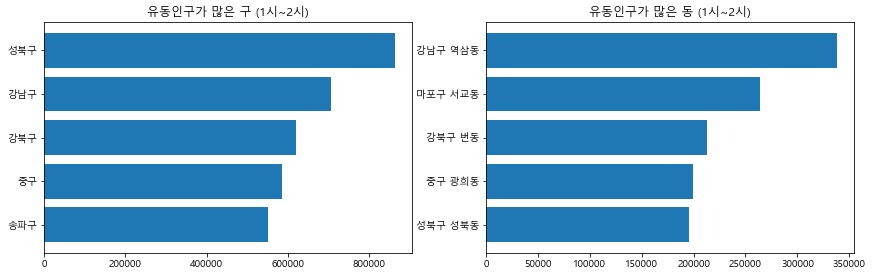

In [4]:
print("칼럼 >> ", menu)
while True:
    res = input("칼럼선택 >> ")
    
    if res in menu:
        break

show_map(res)

## 총합

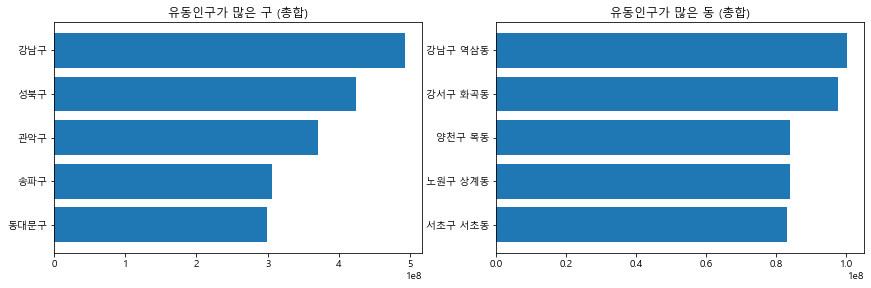

In [2]:
show_map()

## 1시~2시

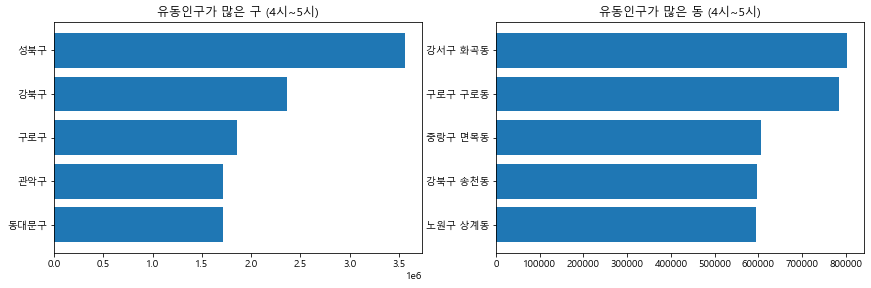

In [13]:
show_map('4시~5시')

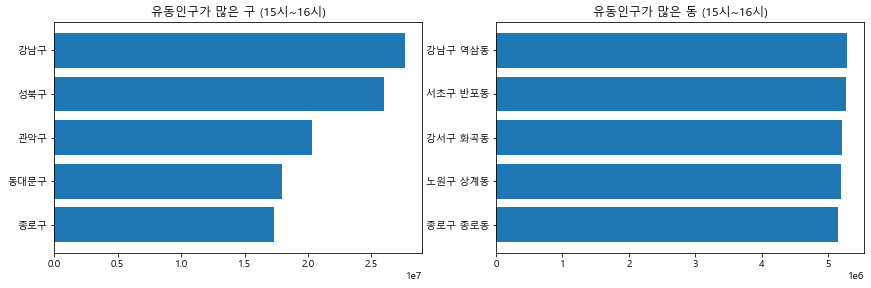

In [34]:
show_map('15시~16시')